In [ ]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

# Predicting Newsletter Subscription Based on Player Experience and Playtime

---

## General Overview
- **Number of Observations (Rows):** 400
- **Number of Variables (Columns):** 7

---

## Potential Issues
- Missing values in some columns (e.g., `Age` and `played_hours`).
- Some columns such as `hashedEmail` and  `Name` may not be useful for analysis due to their hashed nature.
- Possible outliers in `played_hours` (e.g., values like 218.1 and 223.1).

---

## Variables Summary

| **Variable Name** | **Data Type** | **Description**                                                                 | **Potential Issues**                                                                 |
|--------------------|---------------|---------------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| **experience**     | Categorical   | Player's experience level ("Beginner," "Amateur," "Regular," "Veteran," "Pro"). | No major issues.                                                                    |
| **subscribe**      | Boolean       | Indicates whether the player has subscribed (TRUE or FALSE).                    | No major issues.                                                                    |
| **hashedEmail**    | String        | Hashed email address of the player.                                             | Not useful for analysis.                                                            |
| **played_hours**   | Numeric       | Total hours played by the player.                                               | Missing values. |
| **name**           | String        | Name of the player.                                                             | Not useful for analysis.                                       |
| **gender**         | Categorical   | Gender of the player (e.g., "Male," "Female," "Non-binary," "Prefer not to say").| Inconsistent categories (e.g., "Two-Spirited," "Agender"). May need standardization.|
| **Age**            | Numeric       | Age of the player.                                                              | Some unrealistic values (e.g., 9, 49, 50). Missing values.                          |

---

## Key Insights

### Demographics:
- The majority of players are male (70%), with a small percentage identifying as non-binary, agender, or preferring not to say.

### Gaming Behavior:
- Most players have played very few hours (median = 0.1), but there are extreme outliers (e.g., 223.1 hours).
- The most common experience level is "Amateur," followed by "Veteran" and "Regular."

### Subscription Status:
- Approximately 75% of players are subscribed, indicating a high subscription rate.

---

## Potential Issues

### Data Quality:
- Missing values in `Age` and `played_hours`.
- Outliers in `played_hours` and `Age` that may need to be addressed.
- Inconsistent gender categories that may require standardization.

### Data Collection:
- The dataset may suffer from self-reporting bias (e.g., players may misreport their age or hours played).
- The hashed email column (`hashedEmail`) is not useful for analysis and could be removed.
- The `name` column is also not useful for analysis and could be removed.

### Ethical Concerns:
- The dataset includes sensitive information (e.g., gender, age), which should be handled carefully to ensure privacy.

---


## Predicting Newsletter Subscription Based on Player Experience and Playtime**

### **Broad Question:**  
What player characteristics and behaviours are most predictive of subscribing to a newsletter, and how do these features differ between various player types?

### **Specific Question:**  
Can a player’s **experience level** and **total played hours** predict whether they will subscribe to the **newsletter** in the `players.csv` dataset?

### **Response and Explanatory Variables:**  
- **Response Variable (Outcome):** `subscribe` (Boolean: True/False) – Whether a player subscribes to the newsletter.
- **Explanatory Variables (Predictors):**
  - `experience` (Categorical: Pro, Veteran, Amateur, Regular) – The skill level or familiarity of the player.
  - `played_hours` (Numeric) – The total number of hours a player has spent in the game.

### **Data Preparation & Wrangling:**  
To ensure the data is in a usable form for predictive modeling, the following preprocessing steps will be applied:
1. **Data Cleaning:**
   - Remove unnecessary columns such as the (`hashedEmail`, `name`) as they do not contribute to prediction.
   - Handle missing values, specifically filling in missing (`Age`, `played_hours`)  values with the median or mean.
   - Standardize categorical variables (`experience`).

2. **Feature Selection:**
   - Keep only relevant columns (`subscribe`, `experience`, `played_hours`).
   
3. **Transformations & Encoding:**
   - Convert `experience` into a factor variable to use it as a categorical predictor.
   - Ensure `subscribe` is treated as a binary outcome variable.
   
4. **Exploratory Analysis:**
   - Compute mean played hours for each experience level and visualize trends.
   - Examine the proportion of subscribers within each experience group.
   - Use visualizations (histograms, bar charts, scatter plots) to check for patterns between playtime, experience, and subscription likelihood.

### **How the Data Will Address the Question:**  
By analyzing trends in `experience` and `played_hours`, we can determine whether certain player types are more likely to subscribe.

### **Next Steps:**
- Perform descriptive statistics and visualizations to confirm assumptions and.
- Identify any necessary data transformations before predictive modeling.
- Choose and implement an appropriate classification model for prediction.


## Exploring Subscription Rates Through Visual Analysis


Here are several plots to explore the dataset of (players.csv) and its variables. Along with an exploration to find the best predictive variables for newsletter subscription rates (`subscribe`). Here's an explanation of each plot:

---

In [22]:
url <- "https://raw.githubusercontent.com/g-amadorz/dsci-project/refs/heads/main/data/players.csv"

data <- read_csv(url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Mean Subscription Rates by Categorical Variables

To understand how different player characteristics influence newsletter subscription rates, we first must find the mean of the quantiative variables in the dataset. The mean age of a player in this data set is 21 and the played hours is 6.

In [31]:
mean_values <- data |>
  summarize(
    mean_age = mean(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE)
  )

median_values <- data |>
  summarize(
    median_age = median(Age, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE)
  )
mean_values
median_values

mean_age,mean_played_hours
<dbl>,<dbl>
20.52062,5.845918


median_age,median_played_hours
<dbl>,<dbl>
19,0.1


## Mean and Median Values of the Quantitative Variables of Age and Played Hours

The table below shows the mean values for `Age` and `played_hours` in the dataset:

| **Variable**       | **Mean Value**   |
|--------------------|------------------|
| **Age**            | 20.52            |
| **Played Hours**   | 5.85            |

| **Variable**       | **Median Value**   |
|--------------------|------------------|
| **Age**            | 19               |
| **Played Hours**   | 0.1              |

---

### **Explanation**
- **Mean Age:** The average age of players in the dataset is approximately **20.52 years**.
- **Mean Played Hours:** The average number of hours played by players is approximately **5.85 hours**.

- **Median Age:** The average age of players in the dataset is approximately **19 years**.
- **Mean Played Hours:** The average number of hours played by players is approximately **0.1 hours**.

---

### **Insights**
- Players in the dataset are relatively young, with an average age of around 20 years.
- The average playtime is very low with many players not registering even an hour.

## Plot 1: Subscription Rate by Experience Level

To understand how player experience levels influence newsletter subscription rates, I created a bar plot showing the proportion of players who subscribed (`subscribe = TRUE`) for each experience level.

---

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


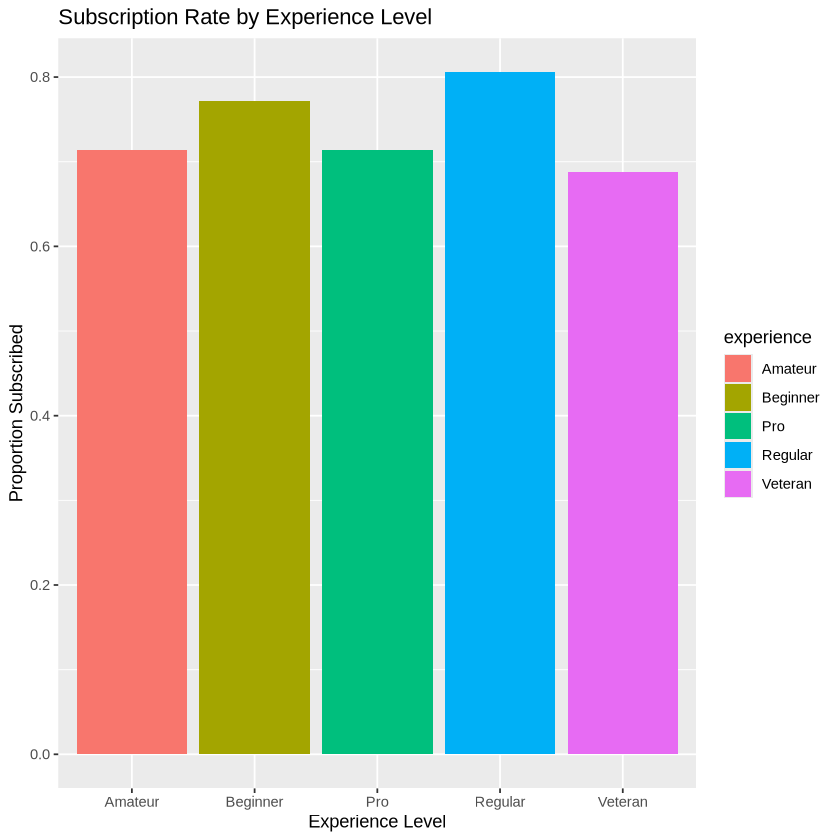

In [29]:
experience <- data |>
  group_by(experience, subscribe) |>
  summarize(count = n()) |>
  mutate(proportion = count / sum(count)) |>
  filter(subscribe == TRUE)

experience_plot <- experience |>
  ggplot(aes(x = experience, y = proportion, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(title = "Subscription Rate by Experience Level",
       x = "Experience Level",
       y = "Proportion Subscribed")

experience_plot

## Conclusion


The plot reveals a clear trend: as player experience increases, so does the likelihood of subscribing to the newsletter.

---

## Plot 2: Subscription Rate by Gender
To understand how player gender could influence newsletter subscription rates, I created a bar plot showing the proportion of players who subscribed (`subscribe = TRUE`) for each gender.

---

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


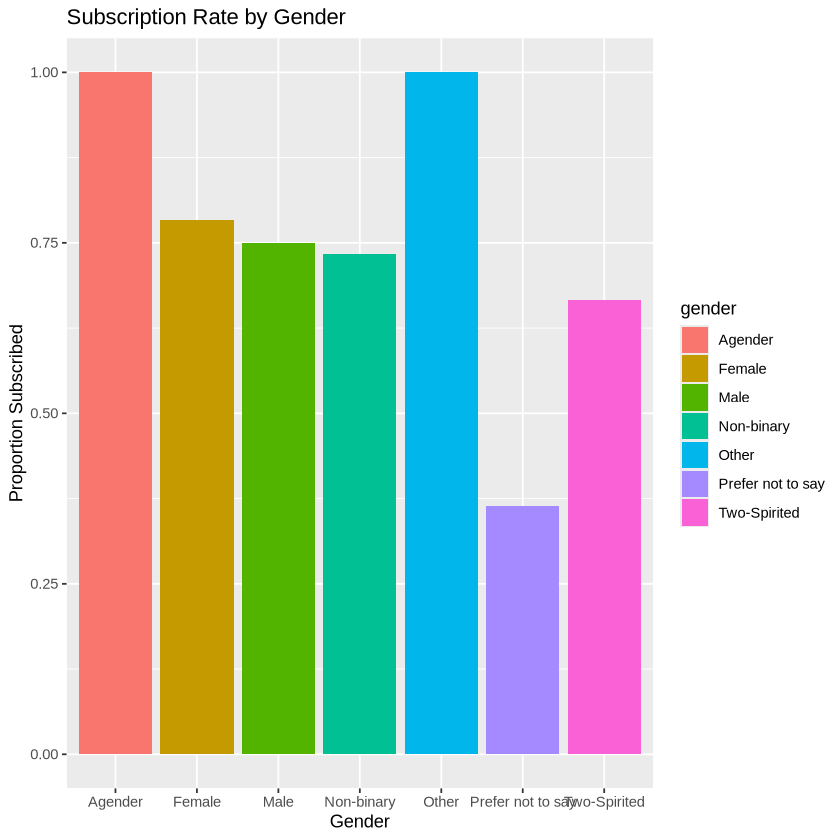

In [18]:
gender <- data |>
  group_by(gender, subscribe) |>
  summarize(count = n()) |>
  mutate(proportion = count / sum(count)) |>
  filter(subscribe == TRUE)

gender_plot <- gender |> ggplot(aes(x = gender, y = proportion, fill = gender)) +
      geom_bar(stat = "identity") +
      labs(title = "Subscription Rate by Gender",
           x = "Gender",
           y = "Proportion Subscribed")

gender_plot

## Conclusion


The plot does not really conclude anything just the fact that around 75% of the playerbase is subscribed. So gender alone will likely not be a good predictive variable for newsletter subscription due to the sample size of some genders.


---

## Plot 3: Subscription Rate by Played Hours
To understand how player gender could influence newsletter subscription rates, I created a bar plot showing the proportion of players who subscribed (`subscribe = TRUE`) for each gender.

---

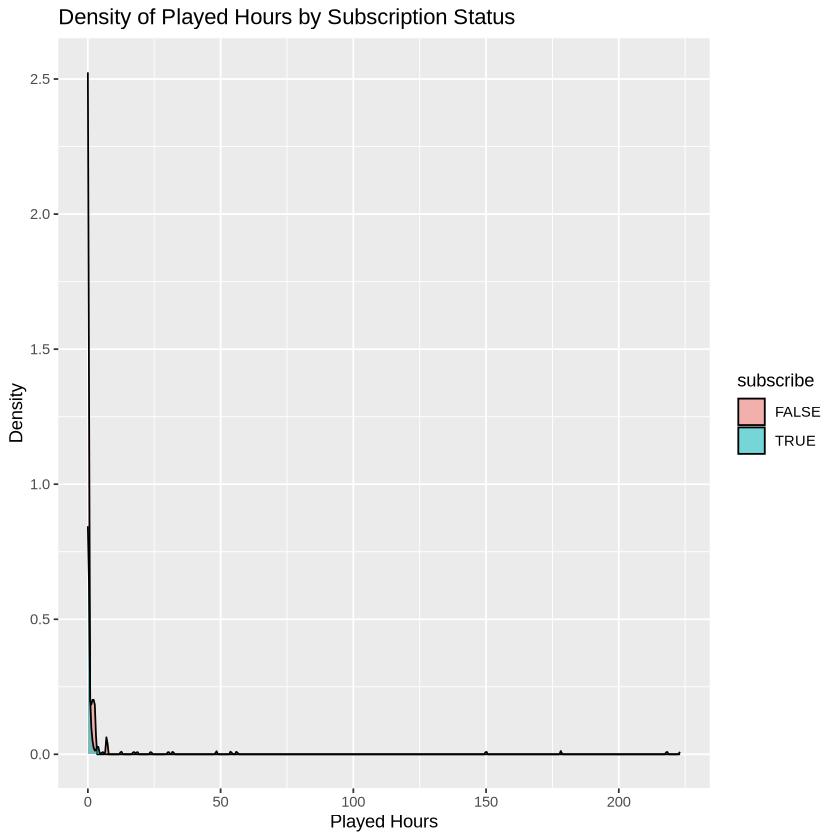

In [69]:
played_hours_plot <- data |>
  ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density of Played Hours by Subscription Status",
       x = "Played Hours",
       y = "Density")

played_hours_plot

## Conclusion

The density plot reveals that players who spend more hours playing are more likely to subscribe to the newsletter.

## Choosing Between Linear Regression and k-Nearest Neighbors (KNN)

To address the question of predicting newsletter subscription (`subscribe`) based on player characteristics (e.g., `Age`, `gender`, `experience`) and behaviors (e.g., `played_hours`), we compare two potential methods: **Linear Regression** and **k-Nearest Neighbors (kNN)**. Here’s why kNN is the better choice for this problem.

---

#### **Why kNN is Appropriate for This Problem**
1. **Binary Target Variable:**
   - kNN can handle binary classification problems, making it suitable for predicting `subscribe` (`TRUE`/`FALSE`).

2. **No Assumptions About Data Distribution:**
   - kNN does not assume a specific relationship between predictors and the target, making it flexible for complex datasets.

3. **Interpretability:**
   - kNN is intuitive and easy to understand: it classifies a data point based on the classes of its nearest neighbors.

#### **Drawbacks of kNN**
1. **Computationally Expensive:**
   - KNN requires storing the entire dataset and calculating distances for each prediction, which can be slow for large datasets.

2. **Sensitive to Feature Scaling:**
   - KNN uses distance metrics (e.g., Euclidean distance), so features must be scaled to ensure equal contribution.

3. **Choice of `k`:**
   - The performance of KNN depends on the choice of `k` (number of neighbors), which must be tuned.

#### **Conclusion:**
kNN is **appropriate** for this problem because it can handle binary classification and does not make strong assumptions about the data.

---

### **Why kNN is the Better Choice**
- The problem involves a **binary classification** (predicting `subscribe`), which kNN can handle effectively, which is proven based on previous excercise in the class, such as

---

### **How to Proceed with kNN**
1. **Standardization:**
   - Scale numeric features (e.g., `played_hours`, `Age`) to ensure equal contribution.

2. **Splitting the Data:**
   - Split the dataset into **training (70%)**, **validation (15%)**, and **test (15%)** sets.
   - Use the validation set to tune the parameter `k` (number of neighbors).

3. **Model Training:**
   - Train the KNN model on the training set.
   - Use cross-validation to evaluate performance and avoid overfitting.

4. **Model Evaluation:**
   - Evaluate the model on the test set using metrics like accuracy, precision, recall.

5. **Tuning:**
   - Experiment with different values of `k` to find the optimal number of neighbors.

---

### **Conclusion**
KNN is the **better choice** for this problem due to its capablity in handling and classifying the binary nature of the target variable (`subscribe`).